In [1]:
#Importy i metody z heliona potrzebne do laborki
import re
import matplotlib.pyplot as plt
from ast import literal_eval
from collections import Counter
import math
import numpy

#Tworzenie pliku ze wspołżędnymi granic województw
with open('poland_shape.txt', 'r') as f_in, open('poland.txt', 'w') as f_out:
    data = literal_eval('{' + f_in.read() + '}')
    x=0
    for k, v in data.items():
            print('<state name = "{city}">'.format(city=k), file=f_out)
            for point in v:
                if x%20==0:
                    print('  <point lat="{point[0]}" lng="{point[1]}" />'.format(point=point), file=f_out)
                    x = x+1
                else:
                    x = x+1
            print('</state>', file=f_out)

def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)


def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
    return math.sqrt(squared_distance(v, w))
def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

def majority_vote(labels):
    #etykiety od najblizszej do najdalszej
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count for count in vote_counts.values() if count == winner_count])

    if num_winners == 1:
        return winner                     
    else:
        return majority_vote(labels[:-1])


def knn_classify(k, labeled_points, new_point):
    by_distance = sorted(labeled_points,
                         key=lambda point_label: distance(point_label[0], new_point))

    k_nearest_labels = [label for _, label in by_distance[:k]]

    return majority_vote(k_nearest_labels)

#Rysowanie mapy polski z granicami wojewodztw
segments = []
points = []

lat_long_regex = r"<point lat=\"(.*)\" lng=\"(.*)\""

with open("poland.txt", "r") as f:
    lines = [line for line in f]

for line in lines:
    if line.startswith("</state>"):
        for p1, p2 in zip(points, points[1:]):
            segments.append((p1, p2))
        points = []
    s = re.search(lat_long_regex, line)
    if s:
        lat, lon = s.groups()
        points.append((float(lon), float(lat)))
def plot_poland_borders(plt):
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lat1, lat2], [lon1, lon2], color='0')


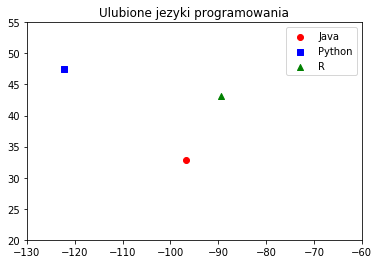

In [2]:
#Przykład z książki 
cities = [([-122.3, 47.53], "Python"), #Seattle
          ([-96.85, 32.85], "Java"),   #Austin
          ([-89.33, 43.13], "R")]      #Madison 

# Klucz definiuje język, a wartość jest parą (długość geogr., szerokość geogr.).
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
# Chcemy nadać każdemu językowy inny znak i kolor.
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors = { "Java" : "r", "Python" : "b", "R" : "g" }
for (longitude, latitude), language in cities:
 plots[language][0].append(longitude)
 plots[language][1].append(latitude)
# Utwórz wykres punktowy danych każdego języka.
for language, (x, y) in plots.items():
 plt.scatter(x, y, color=colors[language], marker=markers[language],
 label=language, zorder=10)
#plot_state_borders(plt) # Załóżmy, że mamy funkcję generującą kontury stanów.
plt.legend(loc=0) # Pozwól pakietowi matplotlib wybrać najlepsze miejsce na legendę.
plt.axis([-130,-60,20,55]) # Definicja osi.
plt.title("Ulubione jezyki programowania")
plt.show()

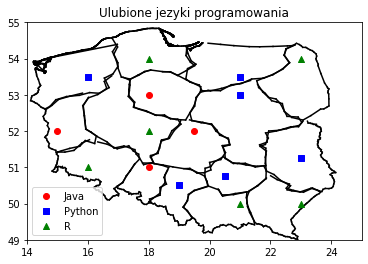

In [3]:
cities = [([50.0, 23.0], "R"), 
          ([50.0, 21.0], "R"),   
          ([50.50, 19.0], "Python"),     
          ([51.0, 18.0], "Java"),   
          ([51.0, 16.0], "R"),      
          ([51.25, 23.0], "Python"),   
          ([50.75, 20.5], "Python"),     
          ([52.0, 19.5], "Java"),   
          ([52.0, 18.0], "R"),      
          ([52.0, 15.0], "Java"),   
          ([53.0, 21.0], "Python"),      
          ([53.0, 18.0], "Java"),   
          ([53.5, 16.0], "Python"),      
          ([54.0, 18.0], "R"),       
          ([53.5, 21.0], "Python"),       
          ([54.0, 23.0], "R")]       

# Klucz definiuje język, a wartość jest parą (długość geogr., szerokość geogr.).
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
# Chcemy nadać każdemu językowy inny znak i kolor.
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors = { "Java" : "r", "Python" : "b", "R" : "g" }
for (longitude, latitude), language in cities:
 plots[language][1].append(longitude)
 plots[language][0].append(latitude)
# Utwórz wykres punktowy danych każdego języka.
for language, (x, y) in plots.items():
 plt.scatter(x, y, color=colors[language], marker=markers[language],label=language, zorder=10)
plot_poland_borders(plt) # Załóżmy, że mamy funkcję generującą kontury stanów.
plt.legend(loc=0) # Pozwól pakietowi matplotlib wybrać najlepsze miejsce na legendę.
plt.axis([14,25,49,55]) # Definicja osi.
plt.title("Ulubione jezyki programowania")
plt.show()

In [4]:
def nearest_neighbours_algorithm(k=1):
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
    markers = { "Java" : "o", "Python" : "s", "R" : "^" }
    colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

    plot_poland_borders(plt)    
    
    for longitude in numpy.arange(14, 25,0.1):
        for latitude in numpy.arange(48,55,0.1):
            predicted_language = knn_classify(k,cities,[latitude,longitude])
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)

    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, zorder=0)

    plt.legend(loc=0)          
    plt.axis([14,25,48,55])
    plt.title("Nearest Neighbour Algorithm for N = " + str(k))
    
    plt.show()

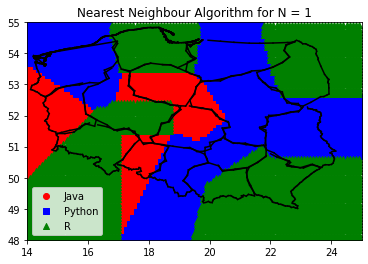

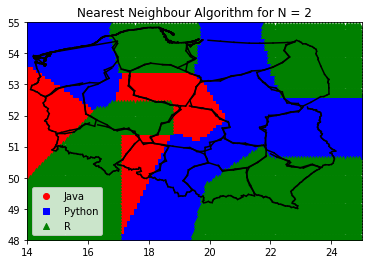

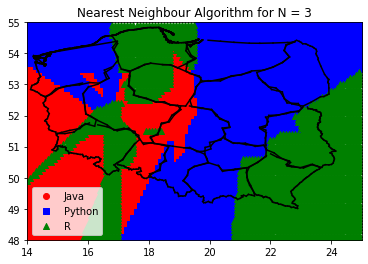

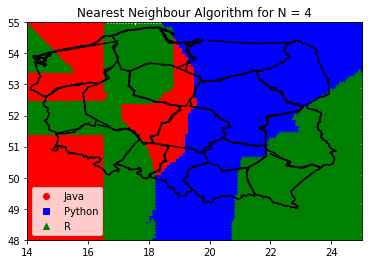

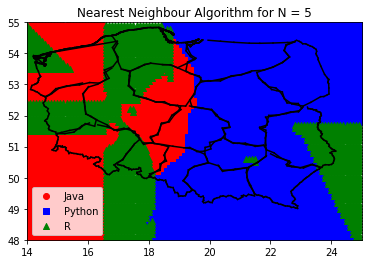

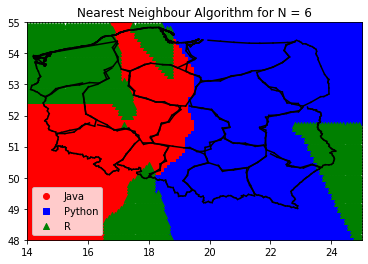

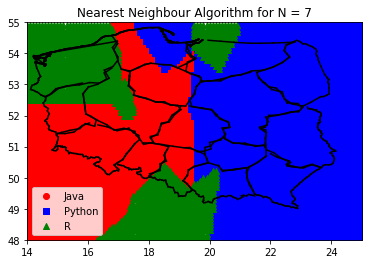

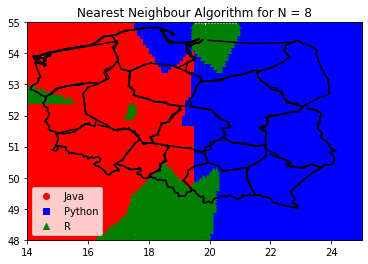

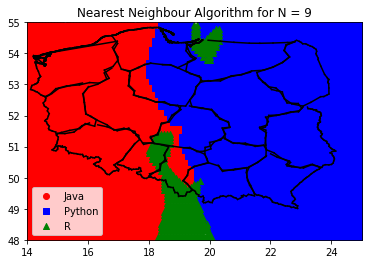

In [5]:
for k in range(1,10):
    nearest_neighbours_algorithm(k)